In [1]:
#module to import other ipynb notebook
#!pip install ipynb 
#!pip install keras
#!pip install tensorflow

# BitcoinVision: Using Machine Learning and Data Mining to Predict The Short-Term and Long-Term Price of Bitcoin

In [2]:
# Import Statements
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import ipynb.fs.full.blockchain_api as blockchain_data
warnings.filterwarnings('ignore') 

In [3]:
# blockchain_data.get_block_details(dir='./resource/block_details')
# blockchain_data.get_market_signals(dir='./resource/market_signals')
# blockchain_data.get_mining_information(dir='./resource/mining_information')
# blockchain_data.get_network_activity(dir='./resource/network_actvity')
# blockchain_data.get_wallet_activity(dir='./resource/wallet_activity')

# Phase 1: Data Understanding

## 1.1. Data Loading

### 1.1.1. Bitcoin Price

In [4]:
bitcoin_price = pd.read_csv('./resource/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
bitcoin_price['Timestamp'] = pd.to_datetime(bitcoin_price.Timestamp, unit='s')
bitcoin_price.index = bitcoin_price['Timestamp']
bitcoin_price = bitcoin_price.drop(columns=['Timestamp'])

In [5]:
bitcoin_price.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bitcoin_price.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


Because the data dates back as early as 2011 which is the year of Bitcoin's inception, there is very little transaction happening in the beginning of the data thus producing a lot of NaN (Null) values whereas the more recent data has transaction happening every minutes.

The NaN values possibly need to be addressed either by resampling the data to 5/10/15/30/60 minute interval, 1 day interval or by imputing the NaNs with 0.


## Plotting Weighted Price

Weighted Price will be our target. Let's plot a line chart of the weighted_price with various resampled timestamp (1 Hour, 1 Day, 1 Week, 1 Month, 1 Quarter (3 months))

bitcoin_price_hour = bitcoin_price.resample('H').mean()
print(f'bitcoin_price_hour shape: {bitcoin_price_hour.shape}')
bitcoin_price_day = bitcoin_price.resample('D').mean()
print(f'bitcoin_price_day shape: {bitcoin_price_day.shape}')
bitcoin_price_week = bitcoin_price.resample('W').mean()
print(f'bitcoin_price_week shape: {bitcoin_price_week.shape}')
bitcoin_price_month = bitcoin_price.resample('M').mean()
print(f'bitcoin_price_month shape: {bitcoin_price_month.shape}')
bitcoin_price_3month = bitcoin_price.resample('3M').mean()
print(f'bitcoin_price_3month shape: {bitcoin_price_3month.shape}')

fig, axes = plt.subplots(5, 1, figsize=(20, 20))

sns.lineplot(ax=axes[0], data=bitcoin_price_hour.Weighted_Price, label='By Hour')

sns.lineplot(ax=axes[1], data=bitcoin_price_day.Weighted_Price, label='By Days')

sns.lineplot(ax=axes[2], data=bitcoin_price_week.Weighted_Price, label='By Week')

sns.lineplot(ax=axes[3], data=bitcoin_price_month.Weighted_Price, label='By Month')

sns.lineplot(ax=axes[4], data=bitcoin_price_3month.Weighted_Price, label='By 3 Months')

plt.show()

### 1.1.2. Block Details (Bitcoin Blockchain Information)

|        Column Name       |                                                    Description                                                    |
|:------------------------:|:-----------------------------------------------------------------------------------------------------------------:|
|        block-size        |                       The total size of the blockchain minus database indexes in megabytes.                       |
|      avg-block-size      |                            The average block size over the past 24 hours in megabytes.                            |
| median-confirmation-time | The median time for a transaction with miner fees to be included in a mined block and added to the public ledger. |
|  n-transaction-per-block |                        The average number of transactions per block over the past 24 hours.                       |
|   n-transactions-total   |                                The total number of transactions on the blockchain.                                |

In [7]:
# Block Details
avg_block_size = pd.read_csv('./resource/block_details/avg-block-size', index_col='Timestamp')
block_size = pd.read_csv('./resource/block_details/blocks-size', index_col='Timestamp')
median_confirmation_time = pd.read_csv('./resource/block_details/median-confirmation-time', index_col='Timestamp')
n_transactions_per_block = pd.read_csv('./resource/block_details/n-transactions-per-block', index_col='Timestamp')
n_transactions_total = pd.read_csv('./resource/block_details/n-transactions-total', index_col='Timestamp')

In [8]:
# avg_block_size
# block_size
# median_confirmation_time
# n_transactions_per_block
# n_transactions_total
block_details_list = [avg_block_size, block_size, median_confirmation_time, n_transactions_per_block, n_transactions_total]

### 1.1.3 Market Signals (Bitcoin Blockchain Information)

|              Column Name             |                                                                                      Description                                                                                      |
|:------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|    Market Value to Realised Value    | MVRV is calculated by dividing Market Value by Realised Value. In Realised Value, BTC prices are taken at the time they last moved, instead of the current price like in Market Value |
|     Network Value to Transactions    |                              NVT is computed by dividing the Network Value (= Market Value) by the total transactions volume in USD over the past 24hour.                             |
| Network Value to Transactions Signal |                             NVTS is a more stable measure of NVT, with the denominator being the moving average over the last 90 days of NVT's denominator                            |

In [9]:
market_value_to_realised_value = pd.read_csv('./resource/market_signals/mvrv')
network_value_to_transactions = pd.read_csv('./resource/market_signals/nvt')
network_value_to_transactions_signal = pd.read_csv('./resource/market_signals/nvts')

In [10]:
# market_value_to_realised_value
# network_value_to_transactions
# network_value_to_transactions_signal
market_signals_list = [market_value_to_realised_value, network_value_to_transactions, network_value_to_transactions_signal]

### 1.1.4 Mining Information (Bitcoin Blockchain Information)

|          Column Name         |                                                Description                                                |
|:----------------------------:|:---------------------------------------------------------------------------------------------------------:|
|     cost-per-transaction     |                   A chart showing miners revenue divided by the number of transactions.                   |
| cost-per-transaction-percent |                  A chart showing miners revenue as percentage of the transaction volume.                  |
|          difficulty          |             A relative measure of how difficult it is to mine a new block for the blockchain.             |
|   fees-usd-per-transaction   |                              Average transaction fees in USD per transaction.                             |
|           hash-rate          |   The estimated number of terahashes per second the bitcoin network is performing in the last 24 hours.   |
|        miners-revenue        |                 Total value of coinbase block rewards and transaction fees paid to miners.                |
|       transaction-fees       | The total BTC value of all transaction fees paid to miners. This does not include coinbase block rewards. |
|     transaction-fees-usd     | The total USD value of all transaction fees paid to miners. This does not include coinbase block rewards. |

In [11]:
cost_per_transaction = pd.read_csv('./resource/mining_information/cost-per-transaction', index_col='Timestamp')
cost_per_transaction_percent = pd.read_csv('./resource/mining_information/cost-per-transaction-percent', index_col='Timestamp')
difficulty = pd.read_csv('./resource/mining_information/difficulty', index_col='Timestamp')
fees_usd_per_transaction = pd.read_csv('./resource/mining_information/fees-usd-per-transaction', index_col='Timestamp')
hash_rate = pd.read_csv('./resource/mining_information/hash-rate', index_col='Timestamp')
miners_revenue = pd.read_csv('./resource/mining_information/miners-revenue', index_col='Timestamp')
transaction_fees = pd.read_csv('./resource/mining_information/transaction-fees', index_col='Timestamp')
transaction_fees_usd = pd.read_csv('./resource/mining_information/transaction-fees-usd', index_col='Timestamp')

In [12]:
#cost_per_transaction
#cost_per_transaction_percent
#difficulty
#fees_usd_per_transaction
#hash_rate
#miners_revenue
#transaction_fees
#transaction_fees_usd
mining_information_list = [cost_per_transaction, cost_per_transaction_percent, difficulty, fees_usd_per_transaction, hash_rate, miners_revenue, transaction_fees, transaction_fees_usd]

### 1.1.5. Network Activity (Bitcoin Blockchain Information)

|            Column Name           |                                                     Description                                                     |
|:--------------------------------:|:-------------------------------------------------------------------------------------------------------------------:|
|   estimated-transaction-volume   | The total estimated value in BTC of transactions on the blockchain. This does not include coins returned as change. |
| estimated-transaction-volume-usd | The total estimated value in USD of transactions on the blockchain. This does not include coins returned as change. |
|          n-transactions          |                                 The total number of confirmed transactions per day.                                 |
| n-transactions-excluding-popular |         The total number of transactions excluding those involving the network's 100 most popular addresses.        |
|        n-unique-addresses        |                             The total number of unique addresses used on the blockchain.                            |
|           output-volume          |      The total value of all transaction outputs per day. This includes coins returned to the sender as change.      |


In [13]:
estimated_transaction_volume = pd.read_csv('./resource/network_activity/estimated-transaction-volume', index_col='Timestamp')
estimated_transaction_volume_usd = pd.read_csv('./resource/network_activity/estimated-transaction-volume-usd', index_col='Timestamp')
n_transactions = pd.read_csv('./resource/network_activity/n-transactions', index_col='Timestamp')
n_transactions_exlcuding_popular = pd.read_csv('./resource/network_activity/n-transactions-excluding-popular', index_col='Timestamp')
n_unique_addresses = pd.read_csv('./resource/network_activity/n-unique-addresses', index_col='Timestamp')
output_volume = pd.read_csv('./resource/network_activity/output-volume', index_col='Timestamp')

In [14]:
# estimated_transaction_volume
# estimated_transaction_volume_usd
# n_transactions
# n_transactions_exlcuding_popular
# n_unique_addresses #Only 3417 rows need to check why
# output_volume 
network_activity_list = [estimated_transaction_volume, estimated_transaction_volume_usd, n_transactions, n_transactions_exlcuding_popular, n_unique_addresses, output_volume]

### 1.1.6. Wallet Activity (Bitcoin Blockchain Information)

|    Column Name    |                         Description                        |
|:-----------------:|:----------------------------------------------------------:|
| n-wallets | The total number of unique Blockchain.com wallets created. |


In [15]:
n_wallets = pd.read_csv('./resource/wallet_activity/my-wallet-n-users')

In [16]:
n_wallets

,Timestamp,my-wallet-n-users
0,2011-12-30 00:00:00,406.0
1,2011-12-31 00:00:00,406.0
2,2012-01-01 00:00:00,412.0
3,2012-01-02 00:00:00,420.0
4,2012-01-03 00:00:00,431.0
...,...,...
26933,2021-05-19 21:54:32,73079866.0
26934,2021-05-19 22:54:32,73079866.0
26935,2021-05-19 23:54:32,73079866.0
26936,2021-05-20 00:54:32,73079866.0


# Phase 2: Data Preparation

## 2.1. Data Cleaning 

### 2.1.1. Bitcoin Price 

For bitcoin price, the data is going to be resampled to be one day worth of data. Thus each column need to be aggregated properly. 

- open = aggregate by choosing the first data of the day

- high = aggregate by choosing the max data of the day

- low = aggregate by choosing the min data of the day

- close = aggregate by choosing the last data of the day

- volume_btc = aggregate by sum up all of the data of the day

- volume_currency = aggregate by sum up all of the data of the day

- weighted_price = aggregate by calculating the mean of all the data of the day

In [17]:
weighted_price = bitcoin_price['Weighted_Price'].resample('D').mean()
volume_currency = bitcoin_price['Volume_(Currency)'].resample('D').sum()
volume_btc = bitcoin_price['Volume_(BTC)'].resample('D').sum()
close = bitcoin_price['Close'].resample('D').last()
low = bitcoin_price['Low'].resample('D').min()
high = bitcoin_price['High'].resample('D').max()
open = bitcoin_price['Open'].resample('D').first()

resampled_bitcoin_price = pd.concat([
    open, high, low, close, volume_btc, volume_currency, weighted_price
], axis=1)
resampled_bitcoin_price = resampled_bitcoin_price.loc[:'2021-03-30'] #Delete the data for 2021-03-31 because it only has 1 row (1 minute) of data so it is unreliable
print('Check for Null Values\n',resampled_bitcoin_price[resampled_bitcoin_price.isnull().any(axis=1)])
resampled_bitcoin_price.loc['2015-01-06':'2015-01-08'] = np.nan # Set everything to NaN for interpolate
resampled_bitcoin_price = resampled_bitcoin_price.interpolate()
print('\nCheck for Null Values after imputing\n',resampled_bitcoin_price[resampled_bitcoin_price.isnull().any(axis=1)])

Check for Null Values
             Open  High  Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                             
2015-01-06   NaN   NaN  NaN    NaN           0.0                0.0   
2015-01-07   NaN   NaN  NaN    NaN           0.0                0.0   
2015-01-08   NaN   NaN  NaN    NaN           0.0                0.0   

            Weighted_Price  
Timestamp                   
2015-01-06             NaN  
2015-01-07             NaN  
2015-01-08             NaN  

Check for Null Values after imputing
 Empty DataFrame
Columns: [Open, High, Low, Close, Volume_(BTC), Volume_(Currency), Weighted_Price]
Index: []


### 2.1.2. Block Details

In [18]:
block_details = pd.concat(block_details_list, axis=1)
block_details.index = pd.to_datetime(block_details.index)
block_details = block_details.loc[:'2021-03-30'] #Remove all data after 2021-03-30 to follow resampled_bitcoin_price data timestamp
block_details

,avg-block-size,blocks-size,median-confirmation-time,n-transactions-per-block,n-transactions-total
Timestamp,,,,,
2011-12-31,0.016243,859.493705,12.133333,34.019868,2114742.0
2012-01-01,0.017073,861.941752,15.050000,32.686275,2119853.0
2012-01-02,0.019121,864.547504,15.566667,35.827815,2124845.0
2012-01-03,0.018212,867.445999,13.616667,36.308176,2130220.0
2012-01-04,0.019351,870.374487,13.616667,38.463087,2135991.0
...,...,...,...,...,...
2021-03-26,1.318636,335474.719544,10.008333,2158.897059,628178277.0
2021-03-27,1.298147,335654.039524,9.116667,1812.949686,628471132.0
2021-03-28,1.315239,335860.427386,7.450000,1563.553459,628759073.0


### 2.1.3. Market Signals

For market signals, since the data is in minutes format, the data is resampled to one day while applying mean aggregate function

In [19]:
market_signals = pd.DataFrame()
for df in market_signals_list:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.index = df['Timestamp']
    df = df.drop(columns=['Timestamp'])
    df = df.resample('D').mean()
    market_signals = pd.concat([market_signals, df], axis=1)
market_signals = market_signals.loc[:'2021-03-30'] #Remove all data after 2021-03-30 to follow resampled_bitcoin_price data timestamp
market_signals

,mvrv,nvt,nvts
Timestamp,,,
2011-12-31,0.857510,27.510527,9.454969
2012-01-01,0.966318,33.344663,10.706339
2012-01-02,1.011669,24.322611,11.225241
2012-01-03,1.045427,32.605144,11.653318
2012-01-04,1.027685,24.021108,11.521200
...,...,...,...
2021-03-26,3.138287,11.518272,12.132993
2021-03-27,3.237818,14.128358,12.547307
2021-03-28,3.270278,17.140425,12.699556


### 2.1.4. Mining Information

In [20]:
mining_information = pd.concat(mining_information_list, axis=1)
mining_information.index.name = 'Timestamp'
mining_information.index = pd.to_datetime(mining_information.index)
mining_information = mining_information.loc[:'2021-03-30']
mining_information

,cost-per-transaction,cost-per-transaction-percent,difficulty,fees-usd-per-transaction,hash-rate,miners-revenue,transaction-fees,transaction-fees-usd
Timestamp,,,,,,,,
2011-12-31,6.583145,9.138363,1.159929e+06,0.003452,9.283326e+00,3.510791e+04,3.945408,1.841019e+01
2012-01-01,7.910605,4.193102,1.159929e+06,0.003438,8.591401e+00,4.260652e+04,3.554281,1.851638e+01
2012-01-02,8.429764,8.391786,1.159929e+06,0.004815,8.764382e+00,6.301249e+04,5.553122,3.598932e+01
2012-01-03,7.434321,7.722457,1.159929e+06,0.004872,9.340986e+00,4.662806e+04,5.352158,3.056013e+01
2012-01-04,7.544980,6.279210,1.159929e+06,0.012517,8.879703e+00,4.706558e+04,14.195877,7.808277e+01
...,...,...,...,...,...,...,...,...
2021-03-26,168.775045,0.661193,2.186556e+13,14.736613,1.478242e+08,4.955404e+07,81.241492,4.326817e+06
2021-03-27,203.627228,1.583865,2.186556e+13,12.716284,1.728239e+08,5.921297e+07,66.631315,3.697781e+06
2021-03-28,236.407218,2.139981,2.186556e+13,13.037265,1.728239e+08,5.877202e+07,58.001620,3.241129e+06


### 2.1.5. Network Activity

For network activity, in the data loading and data exploration phase it was found out that n-unique-addresses, estimated-transaction-volume and estimated-transaction-volume-usd has less low than the rest of the data. Thus, in this phase, here are the action taken to address the missing data after concatenating.

- estimated-transaction-volume = ignore the missing data, it is going to be dropped when the data after 2021-03-30 is deleted
- estimated-transaction-volume-usd = ignore the missing data, it is going to be dropped when the data after 2021-03-30 is deleted
- n-unique-adresses = fill the missing data by calculating the average of the previous and next row value

In [21]:
network_activity = pd.concat(network_activity_list, axis=1)
print(f'Check for missing values with original data\n{network_activity.isnull().sum()}')
network_activity.index.name = 'Timestamp'
network_activity.index = pd.to_datetime(network_activity.index)
network_activity = network_activity.loc[:'2021-03-30']
print(f'\nMissing value after deleting data after 2021-03-30\n{network_activity.isnull().sum()}') #9 rows of n-unique-addresses are missing

Check for missing values with original data
estimated-transaction-volume        1
estimated-transaction-volume-usd    1
n-transactions                      0
n-transactions-excluding-popular    0
n-unique-addresses                  9
output-volume                       0
dtype: int64

Missing value after deleting data after 2021-03-30
estimated-transaction-volume        0
estimated-transaction-volume-usd    0
n-transactions                      0
n-transactions-excluding-popular    0
n-unique-addresses                  9
output-volume                       0
dtype: int64


In [22]:
# Show Missing Data
missing_data = network_activity[network_activity.isnull().any(axis=1)]
missing_data

,estimated-transaction-volume,estimated-transaction-volume-usd,n-transactions,n-transactions-excluding-popular,n-unique-addresses,output-volume
Timestamp,,,,,,
2012-04-07,114536.579400,5.681014e+05,6080.0,6080.0,NaN,3.474648e+05
2012-09-22,235680.224050,2.955430e+06,22014.0,22014.0,NaN,1.487405e+07
2012-12-15,172192.558061,2.388311e+06,32365.0,32365.0,NaN,1.657366e+06
2012-12-29,212853.979838,2.905457e+06,38110.0,38110.0,NaN,9.940917e+05
2013-05-04,193792.078034,1.875907e+07,50493.0,50493.0,NaN,5.169765e+05
2014-10-18,109730.332942,4.204208e+07,66477.0,66477.0,NaN,6.015623e+05
2019-12-20,166611.625143,1.192219e+09,332657.0,324436.0,NaN,1.006115e+06
2020-03-13,548284.152816,2.755020e+09,276798.0,268867.0,NaN,2.348969e+06
2020-05-22,143644.375652,1.309276e+09,278784.0,273638.0,NaN,9.870880e+05


In [23]:
# Fill in missing data using interpolate function
network_activity['n-unique-addresses'] = network_activity['n-unique-addresses'].interpolate().round()
network_activity.loc[missing_data.index]

,estimated-transaction-volume,estimated-transaction-volume-usd,n-transactions,n-transactions-excluding-popular,n-unique-addresses,output-volume
Timestamp,,,,,,
2012-04-07,114536.579400,5.681014e+05,6080.0,6080.0,11328.0,3.474648e+05
2012-09-22,235680.224050,2.955430e+06,22014.0,22014.0,26685.0,1.487405e+07
2012-12-15,172192.558061,2.388311e+06,32365.0,32365.0,30448.0,1.657366e+06
2012-12-29,212853.979838,2.905457e+06,38110.0,38110.0,35136.0,9.940917e+05
2013-05-04,193792.078034,1.875907e+07,50493.0,50493.0,61344.0,5.169765e+05
2014-10-18,109730.332942,4.204208e+07,66477.0,66477.0,182866.0,6.015623e+05
2019-12-20,166611.625143,1.192219e+09,332657.0,324436.0,509576.0,1.006115e+06
2020-03-13,548284.152816,2.755020e+09,276798.0,268867.0,585269.0,2.348969e+06
2020-05-22,143644.375652,1.309276e+09,278784.0,273638.0,591293.0,9.870880e+05


In [24]:
print(f'Check for anymore missing values\n{network_activity.isnull().sum()}')
network_activity

Check for anymore missing values
estimated-transaction-volume        0
estimated-transaction-volume-usd    0
n-transactions                      0
n-transactions-excluding-popular    0
n-unique-addresses                  0
output-volume                       0
dtype: int64


,estimated-transaction-volume,estimated-transaction-volume-usd,n-transactions,n-transactions-excluding-popular,n-unique-addresses,output-volume
Timestamp,,,,,,
2011-12-31,85946.666598,3.841816e+05,5137.0,5137.0,8198.0,2.705356e+05
2012-01-01,201609.048310,1.016110e+06,5001.0,5001.0,8531.0,3.475037e+05
2012-01-02,142482.534073,7.508830e+05,5410.0,5410.0,8928.0,2.626304e+05
2012-01-03,110788.668431,6.037982e+05,5773.0,5773.0,9528.0,2.707430e+05
2012-01-04,139580.305439,7.495462e+05,5731.0,5731.0,9542.0,4.005940e+05
...,...,...,...,...,...,...
2021-03-26,140851.734595,7.494637e+09,293610.0,289918.0,790548.0,1.455943e+06
2021-03-27,67802.903361,3.738512e+09,288259.0,284638.0,722993.0,1.234256e+06
2021-03-28,49183.455835,2.746380e+09,248605.0,244003.0,629197.0,9.218715e+05


### 2.1.6. Wallet Activity

For wallet activity, instead of having the total number of wallets, process the column to represent the number of new wallets created per day.

In [25]:
n_wallets['Timestamp'] = pd.to_datetime(n_wallets.Timestamp)
n_wallets.index = n_wallets.Timestamp
new_n_wallets_data = n_wallets.drop(columns=['Timestamp'])

# Create a new column dataframe to process new-n-wallets-created per day
new_n_wallets_created = new_n_wallets_data.copy()
new_n_wallets_created = new_n_wallets_created.diff()
new_n_wallets_created = new_n_wallets_created.resample('D').sum()
new_n_wallets_created.rename(columns={'my-wallet-n-users':'new-n-wallets-created'}, inplace=True)
print('Number of Null Values:', new_n_wallets_created.isnull().sum())

# Clean the original column
resampled_n_wallets = new_n_wallets_data.resample('D').last()
resampled_n_wallets = resampled_n_wallets.interpolate().round()
print("Number of Null Values:", resampled_n_wallets.isnull().sum())

# Concatenate the two columns
wallets_activity = pd.concat([new_n_wallets_created, resampled_n_wallets], axis=1)
wallets_activity = wallets_activity.loc['2011-12-31':'2021-03-30']
wallets_activity

Number of Null Values: new-n-wallets-created    0
dtype: int64
Number of Null Values: my-wallet-n-users    0
dtype: int64


,new-n-wallets-created,my-wallet-n-users
Timestamp,,
2011-12-31,0.0,406.0
2012-01-01,6.0,412.0
2012-01-02,8.0,420.0
2012-01-03,11.0,431.0
2012-01-04,20.0,451.0
...,...,...
2021-03-26,44127.0,70342663.0
2021-03-27,55469.0,70398132.0
2021-03-28,43385.0,70441517.0


## 2.2. Data Integration

In [26]:
df = pd.concat([
    resampled_bitcoin_price, block_details, market_signals, mining_information, network_activity, wallets_activity
], axis=1)

## 2.3. Feature Selection

Based on using Random Forest Regression to choose relevant features the top relevant features in descending order are:

- High
- Open
- Low
- block-size
- n-transaction-total
- my-wallet-n-users
- Close
- cost-per-transaction

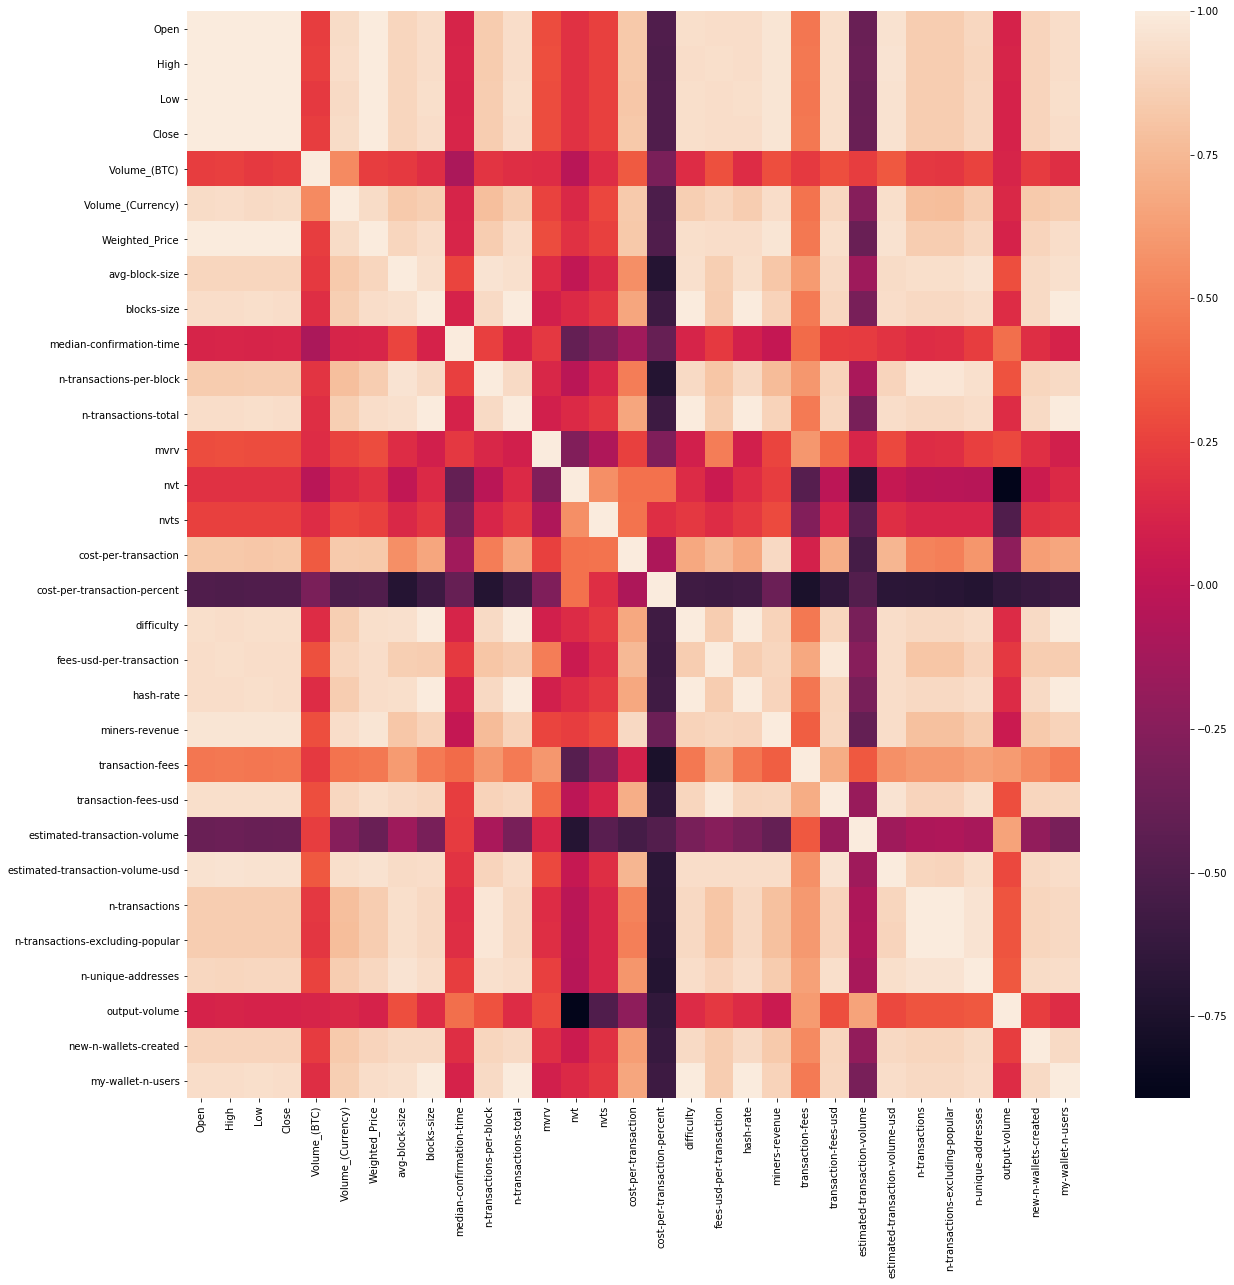

Weighted_Price                      1.000000
High                                0.999792
Open                                0.999781
Close                               0.999762
Low                                 0.999298
miners-revenue                      0.966846
estimated-transaction-volume-usd    0.954883
transaction-fees-usd                0.940320
difficulty                          0.933801
hash-rate                           0.933427
fees-usd-per-transaction            0.933012
my-wallet-n-users                   0.933012
n-transactions-total                0.933012
blocks-size                         0.933012
Volume_(Currency)                   0.922323
n-unique-addresses                  0.897285
avg-block-size                      0.892267
new-n-wallets-created               0.888802
n-transactions                      0.849791
n-transactions-excluding-popular    0.846267
n-transactions-per-block            0.845018
cost-per-transaction                0.825090
cost-per-t

In [27]:
from scipy.stats import spearmanr

coef, p = spearmanr(df)
plt.figure(figsize=(20,20))
sns.heatmap(coef, xticklabels=df.columns, yticklabels=df.columns)
plt.show()

coef = pd.DataFrame(coef, columns=df.columns, index=df.columns)
coef = coef['Weighted_Price']
print(abs(coef).sort_values(ascending=False))

'''
Selected features if coef > 0.9 and coef < 0.99 to avoid underfitting and overfitting. There are a few columns that
is also highly correlated (0.75 < coef < 0.9) but I want to avoid selecting too many features. 
Furthermore, Close, Open, Low and High all are basically the same thing as weighted_price thus is ignored to avoid overfitting
TODO: Can add more features to see if performance increase
'''
selected_features = ['miners-revenue','estimated-transaction-volume-usd','transaction-fees-usd',
                     'difficulty', 'hash-rate', 'fees-usd-per-transaction', 'blocks-size',
                     'my-wallet-n-users','n-transactions-total','Volume_(Currency)','Weighted_Price']
feature_extracted_df = df.reindex(columns=selected_features) # Only select the selected features for the new data

## 2.4. Data Splitting 

In [29]:
# Split reframed supervised timeseries data to train and test
def train_test_split(data, n_timesteps=1, n_features=11, n_test=1):
    if isinstance(data, pd.DataFrame):
        data = np.array(data)
    n_obs = n_timesteps * n_features
    X_train, X_test = data[:-n_test, :n_obs], data[-n_test:, :n_obs]
    y_train, y_test = data[:-n_test, -1], data[-n_test:, -1]
    return X_train, X_test, y_train, y_test #np.array

## 2.5. Data Transformation

# TODO: TRY OTHER TRANSFORMATION TECHNIQUE. BOX-COX AND LOG TRANSFORM

In [30]:
# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# To reframe timeseries data for supervised learning
def timeseries_to_supervised(data, columns, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{name}(t-{i})' for name in columns]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{name}(t)' for name in columns]
        else:
            names += [f'{name}(t+{i})' for name in columns]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg #pd.DataFrame

# Transform data by differencing current value with previous value to create stationarity
def difference(data, interval=1):
    if isinstance(data, pd.DataFrame):
        data = np.array(data)
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return np.array(diff) #np.array

# invert differenced value to return to original scale
def inverse_difference(original_data, y_pred, interval=1):
    return y_pred + original_data[-interval]

# Apply MinMaxScaler
def scale(train, test):
    if len(train.shape) == 1 and len(test.shape) == 1:
        train = train.reshape(-1, 1)
        test = test.reshape(-1, 1)
    scaler = MinMaxScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    return scaler, train, test

# invert scaled value to original scale
def inverse_scale(scaler, y_pred):
    y_pred = scaler.inverse_transform(y_pred)
    return y_pred


feature_extracted_df = feature_extracted_df['2016':] # Remove values before 2016

# Conduct Differencing
raw_values = feature_extracted_df.values
diff_values = difference(raw_values, 1)

# Phase 3: Data Modelling

# Persistence Model Testing

In [31]:
from sklearn.metrics import mean_absolute_error
X = feature_extracted_df.values
train, test = X[0:-30, -1], X[-30:, -1]
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    predictions.append(history[-1])  # predicted result will always be lagged value of 1 of the predicted result
    history.append(test[i])
MAE = mean_absolute_error(test, predictions)
print(f'MAE: {MAE}')

MAE: 1457.289255413314


Persistence model is a baseline model that uses the previous value (t-1) of current Weighted_Price of time (t) as its predicted result. Logically, complex model should be able to perform better than a simple persistence model.

## 3.1. Random Forest

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Random Forest
def forecast_random_forest(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred[0]

def fit_random_forest(X_train, y_train, n_estimators=500):
    random_forest = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state=1)
    model  = TransformedTargetRegressor(regressor=random_forest, transformer=MinMaxScaler())
    model.fit(X_train, y_train)
    return model

def experiment_random_forest(data, n_timesteps, n_features, n_test, n_estimators=500):
    supervised_values = timeseries_to_supervised(data, feature_extracted_df.columns, n_timesteps)
    X_train, X_test, y_train, y_test = train_test_split(supervised_values, n_timesteps, n_features, n_test)
    # Apply MinMaxScaler to X data. Scaling for y data will be handled by meta-estimator TransformedTargetRegressor
    X_scaler, X_train, X_test = scale(X_train, X_test)
    # Copy train data 
    X_train_copy = np.copy(X_train)
    y_train_copy = np.copy(y_train)
    # Copy real y_test values
    ori_y_test_values = feature_extracted_df.values[-n_test:, -1]
    predictions = list()
    # Walk-Forward Validation
    for i in range(n_test):
        model = fit_random_forest(X_train_copy, y_train_copy, n_estimators)
        X_test_copy = X_test[i].reshape(1, X_test.shape[1])
        y_pred = forecast_random_forest(model, X_test_copy)
        y_pred = inverse_difference(raw_values[:, -1], y_pred, n_test+1-i)
        predictions.append(y_pred)
        X_train_copy = concatenate((X_train_copy, X_test[i].reshape(1, X_test.shape[1])))
        y_train_copy = concatenate((y_train_copy, y_test[i].reshape(1)))
#         print(f'y_pred {i} = {predictions[i]}, expected = {ori_y_test_values[i]}')
        
    MAE = mean_absolute_error(ori_y_test_values, predictions)
    return MAE, ori_y_test_values, predictions

def run_random_forest(n_timesteps, n_test, data, n_estimators):
    n_features = len(feature_extracted_df.columns) # 11
    error, original_values, predictions = experiment_random_forest(data, n_timesteps, n_features, n_test, n_estimators=n_estimators)
    print(f'MAE {error}')
    return error, original_values, predictions

# 3.2. LSTM

In [ ]:
# Stateless LSTM

from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

def forecast_lstm(model, batch_size, X_test):
    X_test = X_test.reshape((1, X_test.shape[0], X_test.shape[1])) 
    y_pred = model.predict(X_test, batch_size=batch_size)
    return y_pred

def update_model(model, X_train, y_train, batch_size, updates):
    model.fit(X_train, y_train, epochs=updates, batch_size=batch_size, verbose=1, shuffle=False)

def fit_lstm(X_train, y_train, batch_size=100, n_epochs=50, neurons=50):
    model=Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=False))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, shuffle=False)
    return model

def experiment_lstm(repeats, data, updates, n_timesteps, n_features, n_test, n_epochs, neurons):
    supervised_values = timeseries_to_supervised(data, feature_extracted_df.columns, n_timesteps)
    X_train, X_test, y_train, y_test = train_test_split(supervised_values, n_timesteps, n_features, n_test)
    # Apply MinMaxScaler to both X and y data
    X_scaler, X_train, X_test = scale(X_train, X_test)
    y_scaler, y_train, y_test = scale(y_train, y_test)
    # Reshape X data to 3 dimensional as per LSTM input requirement
    X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
    X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))
    # Reset y_test to original data without any pre-processing 
    ori_y_test_values = feature_extracted_df.values[-n_test:, -1]

    # Repeatedly train and test LSTM model to eliminate outlier results
    error_scores = list()
    prediction_list = list()
    for r in range(repeats):
        print(f'Stateless Repeat {r}. Initial Fit Model. neurons: {neurons}')
        lstm_model = fit_lstm(X_train, y_train, batch_size=1, n_epochs=n_epochs, neurons=neurons) 
        # Copy train data so tested data from walk-forward validation can be appended
        X_train_copy = np.copy(X_train)
        y_train_copy = np.copy(y_train)  
        
        # Walk-Forward Validation
        predictions = list()
        for i in range(n_test):  
            if i > 0:
                print(f'Stateless Repeat {r}. Test Data: {i}. neurons: {neurons}')
                update_model(lstm_model, X_train_copy, y_train_copy, 1, updates)
            X_test_copy = X_test[i]
            y_pred = forecast_lstm(lstm_model, 1, X_test_copy)
            y_pred = inverse_scale(y_scaler, y_pred)
            y_pred = y_pred[0][0] # inverse_scale return a 2-d ndarray
            y_pred = inverse_difference(raw_values[:, -1], y_pred, n_test+1-i)
            predictions.append(y_pred)
            X_train_copy = concatenate((X_train_copy, X_test[i].reshape(1, X_test.shape[1], X_test.shape[2])))        
            y_train_copy = concatenate((y_train_copy, y_test[i].reshape(1, y_test.shape[1])))
        # Report Performance
        MAE = mean_absolute_error(ori_y_test_values, predictions)
        print(f'Stateless Repeat {r}. MAE = {MAE}. neurons: {neurons}')
        error_scores.append(MAE)
        prediction_list.append(predictions)
    return error_scores, prediction_list    
    
def run_lstm(n_timesteps, n_test, data, n_epochs, neurons):
    repeats = 10 # 10 is recommended
    results = pd.DataFrame()
    updates = 5 # 5 or more is recommended
    n_features = len(feature_extracted_df.columns) # 11
    n_epochs = n_epochs
    neurons = neurons
    results['Results'], results['prediction_list'] = experiment_lstm(
        repeats,
        data,
        updates,
        n_timesteps,
        n_features,
        n_test,
        n_epochs,
        neurons
    )
    
    return results

TODO: Next Step:
for LSTM
- add walk-forward validation with updated model everytime(?)
- Generalize with function to be able to use different timestep
- Compare Stationary to non-stationary for different timestep. For now use stationary first


# 3.3. Hyperparameter Tuning Result

For Both Model:

- Lag values of 5, 10, 20, 50 and 100 (Based on Ji et al)

For Random Forest

- number of estimators used are 100, 200, 500, 750 and 1000 

For LSTM:

- Initial tuning set lag value to 5, 5 update epoch, 5 initial fit epoch and 10 repeats
- A comparison of Stateless vs Stateful LSTM is done (Stateless win)
- 1 layers LSTM with 5, 10, 25, 35 and 50 neurons
- 2 layers of LSTM with a dropout layer in between set to 0.2. LSTM neurons set to the best result acquired form the previous test. 